In [22]:
#data preprocessing
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

%matplotlib inline

In [23]:
#read csv
train = pd.read_csv('epl_train.csv')
test = pd.read_csv('epl_test.csv')

In [24]:
display(train)

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTGS,ATGS,HTGC,ATGC,HTP,ATP,HM1,HM2,HM3,HM4,HM5,AM1,AM2,AM3,AM4,AM5,B365H,B365D,B365A,HomeTeamLP,AwayTeamLP,MW,HTFormPtsStr,ATFormPtsStr,HTFormPts,ATFormPts,HTWinStreak3,HTWinStreak5,HTLossStreak3,HTLossStreak5,ATWinStreak3,ATWinStreak5,ATLossStreak3,ATLossStreak5,HTGD,ATGD,DiffPts,DiffFormPts,DiffLP
0,0,2009-08-15,Aston Villa,Wigan,0,2,A,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.67,3.60,5.50,6.0,16.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-10.0
1,1,2009-08-15,Blackburn,Man City,0,2,A,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,3.60,3.25,2.10,10.0,5.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,5.0
2,2,2009-08-15,Bolton,Sunderland,0,1,A,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,2.25,3.25,3.25,14.0,13.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,1.0
3,3,2009-08-15,Chelsea,Hull,2,1,H,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,1.17,6.50,21.00,1.0,19.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,-18.0
4,4,2009-08-15,Everton,Arsenal,1,6,A,0,0,0,0,0.000000,0.000000,M,M,M,M,M,M,M,M,M,M,3.20,3.25,2.30,8.0,3.0,1.0,MMMMM,MMMMM,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4174,4174,2020-07-26,Everton,Bournemouth,1,3,A,43,37,53,64,1.289474,0.815789,W,D,L,D,L,L,L,W,D,L,2.25,3.70,3.00,12.0,18.0,38.0,WDLDL,LLWDL,5,4,0,0,0,0,0,0,0,0,-0.263158,-0.710526,0.473684,0.026316,-6.0
4175,4175,2020-07-26,Leicester,Man United,0,2,A,67,64,39,36,1.631579,1.657895,L,W,L,D,W,D,W,D,W,W,3.25,3.50,2.20,5.0,3.0,38.0,LWLDW,DWDWW,7,11,0,0,0,0,0,0,0,0,0.736842,0.736842,-0.026316,-0.105263,2.0
4176,4176,2020-07-26,Man City,Norwich,5,0,H,97,26,35,70,2.052632,0.552632,W,W,W,W,L,L,L,L,L,L,1.08,11.00,26.00,2.0,20.0,38.0,WWWWL,LLLLL,12,0,0,0,0,0,0,0,1,1,1.631579,-1.157895,1.500000,0.315789,-18.0
4177,4177,2020-07-26,Newcastle,Liverpool,1,3,A,37,82,55,32,1.157895,2.526316,D,L,L,L,D,W,L,D,W,W,7.50,5.25,1.36,13.0,1.0,38.0,DLLLD,WLDWW,2,10,0,0,0,0,0,0,0,0,-0.473684,1.315789,-1.368421,-0.210526,12.0


In [25]:
#Drop some columns for train
train = train[train.MW > 3]

train.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','HM5','AM4','AM5','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3'],1, inplace=True)

display(train.head())
# Preview data.
#Full Time Result (H=Home Win, D=Draw, A=Away Win)
#HTGD - Home team goal difference
#ATGD - away team goal difference
#HTP - Home team points
#ATP - Away team points
#DiffFormPts Diff in points
#DiffLP - Differnece in last years prediction

#Input - 12 other features (fouls, shots, goals, misses,corners, red card, yellow cards)
#Output - Full Time Result (H=Home Win, D=Draw, A=Away Win) 

C:\Users\WeiWen\AppData\Local\Temp/ipykernel_11160/431520252.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train.drop(['Unnamed: 0','HomeTeam', 'AwayTeam', 'Date', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',


,FTR,HTP,ATP,HM1,HM2,HM3,AM1,AM2,AM3,B365H,B365D,B365A,HTGD,ATGD,DiffFormPts,DiffLP
30,H,1.00,1.50,D,L,W,W,L,W,2.38,3.25,3.20,-0.50,0.00,-0.50,-2.0
31,H,2.25,1.00,W,W,W,D,W,L,1.36,4.75,9.00,1.50,0.00,1.25,-5.0
32,D,0.75,0.75,L,W,L,W,L,L,2.10,3.30,3.60,-0.50,-1.00,0.00,-4.0
33,H,1.50,0.75,W,W,L,L,L,W,1.73,3.60,5.25,0.50,-0.75,0.75,-6.0
34,H,0.75,0.75,W,L,L,L,L,W,1.73,3.60,5.25,-1.25,-1.00,0.00,-8.0


In [26]:
# Separate into feature set and target variable
#FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)
X_all = train.drop(['FTR'],1)
y_all = train['FTR']

C:\Users\WeiWen\AppData\Local\Temp/ipykernel_11160/1772218.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X_all = train.drop(['FTR'],1)


In [27]:
#last 3 wins for both sides
X_all.HM1 = X_all.HM1.astype('str')
X_all.HM2 = X_all.HM2.astype('str')
X_all.HM3 = X_all.HM3.astype('str')
X_all.AM1 = X_all.AM1.astype('str')
X_all.AM2 = X_all.AM2.astype('str')
X_all.AM3 = X_all.AM3.astype('str')

#we want continous vars that are integers for our input data, so lets remove any categorical vars
def preprocess_features(X):
    ''' Preprocesses the football data and converts catagorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)
                    
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (27 total features):
['HTP', 'ATP', 'HM1_D', 'HM1_L', 'HM1_W', 'HM2_D', 'HM2_L', 'HM2_W', 'HM3_D', 'HM3_L', 'HM3_W', 'AM1_D', 'AM1_L', 'AM1_W', 'AM2_D', 'AM2_L', 'AM2_W', 'AM3_D', 'AM3_L', 'AM3_W', 'B365H', 'B365D', 'B365A', 'HTGD', 'ATGD', 'DiffFormPts', 'DiffLP']


In [28]:
from sklearn.model_selection import train_test_split

# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
                                                    test_size = 0.1,
                                                    random_state = 2,
                                                    stratify = y_all)

In [29]:
#for measuring training time
from time import time 
# F1 score (also F-score or F-measure) is a measure of a test's accuracy. 
#It considers both the precision p and the recall r of the test to compute 
#the score: p is the number of correct positive results divided by the number of 
#all positive results, and r is the number of correct positive results divided by 
#the number of positive results that should have been returned. The F1 score can be 
#interpreted as a weighted average of the precision and recall, where an F1 score 
#reaches its best value at 1 and worst at 0.
from sklearn.metrics import f1_score

def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print("Trained model in {:.4f} seconds".format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print("Made predictions in {:.4f} seconds.".format(end - start))
    
    return f1_score(target, y_pred, pos_label='H',average='micro'), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print("F1 score and accuracy score for training set: {:.4f} , {:.4f}.".format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print("F1 score and accuracy score for test set: {:.4f} , {:.4f}.".format(f1 , acc))

# Decision Tree

In [30]:
X_train.head()

,HTP,ATP,HM1_D,HM1_L,HM1_W,HM2_D,HM2_L,HM2_W,HM3_D,HM3_L,HM3_W,AM1_D,AM1_L,AM1_W,AM2_D,AM2_L,AM2_W,AM3_D,AM3_L,AM3_W,B365H,B365D,B365A,HTGD,ATGD,DiffFormPts,DiffLP
2817,1.687500,0.750000,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1.22,7.0,15.00,0.812500,-1.125000,0.125000,-16.0
478,1.100000,1.200000,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,2.20,3.2,3.50,0.100000,0.100000,0.000000,2.0
1894,2.184211,1.052632,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1.17,9.0,17.00,1.657895,-0.236842,0.263158,-12.0
2439,2.000000,0.937500,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,3.20,3.5,2.35,0.687500,-0.437500,0.562500,-9.0
1786,1.370370,1.037037,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,2.10,3.4,3.90,-0.222222,-0.333333,-0.037037,-5.0


In [31]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

modelDT = DT()
modelDT = modelDT.fit(X_train, y_train)
preds_DT = modelDT.predict(X_test)
train_predict(modelDT, X_train, y_train, X_test, y_test)
print('Accuracy of DecisionTreeClassifier on test set: {:.2f}'.format(metrics.accuracy_score(y_test, preds_DT)))
print('Logistic Regression Confusion Matrix \n', metrics.confusion_matrix(y_test, preds_DT))

Training a DecisionTreeClassifier using a training set size of 3464. . .
Trained model in 0.0795 seconds
Made predictions in 0.0061 seconds.
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000.
Made predictions in 0.0050 seconds.
F1 score and accuracy score for test set: 0.4649 , 0.4649.
Accuracy of DecisionTreeClassifier on test set: 0.46
Logistic Regression Confusion Matrix 
 [[ 46  33  32]
 [ 20  30  44]
 [ 39  41 100]]


C:\Users\WeiWen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "
C:\Users\WeiWen\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1298: UserWarning: Note that pos_label (set to 'H') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


# Random Forest

In [32]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 400, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start = 1, stop = 10, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 143, 147, 151, 155, 159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 199, 203, 206, 210, 214, 218, 222, 226, 230, 234, 238, 242, 246, 250, 254, 258, 262, 266, 270, 273, 277, 281, 285, 289, 293, 297, 301, 305, 309, 313, 317, 321, 325, 329, 333, 336, 340, 344, 348, 352, 356, 360, 364, 368, 372, 376, 380, 384, 388, 392, 396, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [33]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 13, 17, 21, 25, 29,
                                                         33, 37, 41, 45, 49, 53,
                                                         57, 61, 65, 69, 73, 76,
                                                         80, 84, 88, 92, 96,
                                                         100, 104, 108, 112,
                                                         116, 120, 1

In [34]:
rf_random.best_params_

{'n_estimators': 273,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

In [35]:
#best parameter
rf = RandomForestClassifier(n_estimators= 305,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features= 'auto',
 max_depth= 4,
 bootstrap= True)
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)

In [36]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5584415584415584


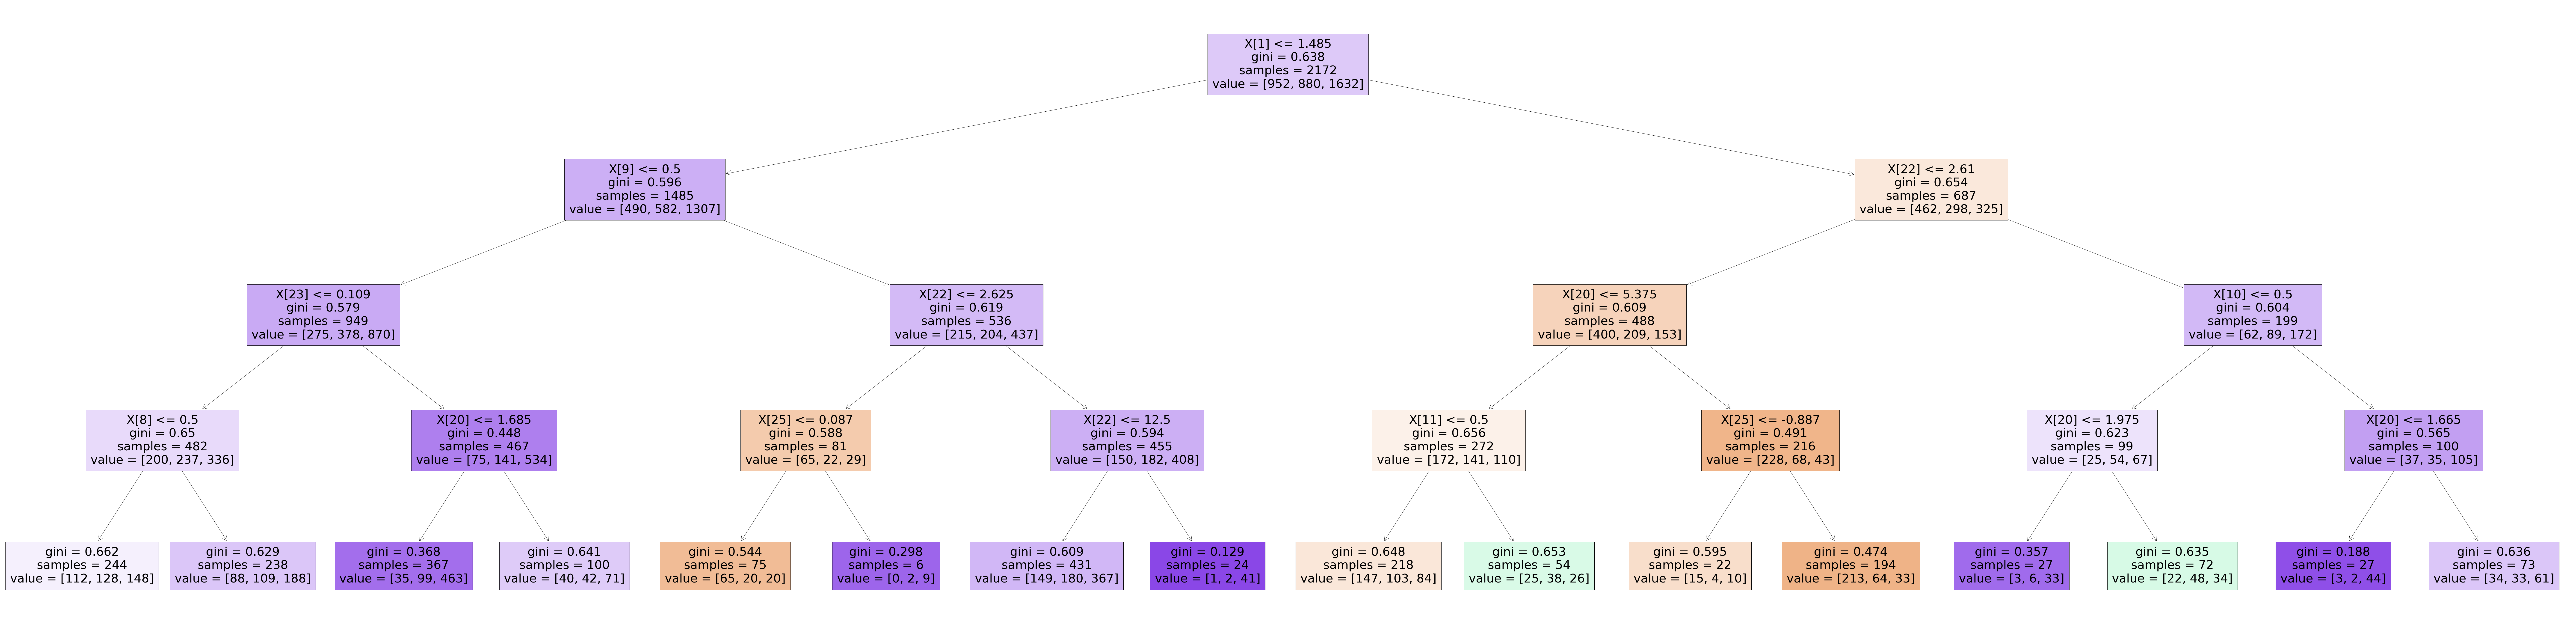

In [37]:
from sklearn import tree

estimator = rf.estimators_[5]
plt.figure(figsize=(200, 50)) # Resize figure
tree.plot_tree(estimator, filled=True)
plt.show()


In [38]:
# Get numerical feature importances
featuresList = list(X_train.columns)
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(featuresList, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: DiffLP               Importance: 0.29
Variable: B365H                Importance: 0.17
Variable: B365A                Importance: 0.16
Variable: HTGD                 Importance: 0.07
Variable: HTP                  Importance: 0.06
Variable: B365D                Importance: 0.06
Variable: ATGD                 Importance: 0.05
Variable: ATP                  Importance: 0.04
Variable: DiffFormPts          Importance: 0.04
Variable: HM1_L                Importance: 0.01
Variable: HM1_W                Importance: 0.01
Variable: AM1_L                Importance: 0.01
Variable: AM1_W                Importance: 0.01
Variable: HM1_D                Importance: 0.0
Variable: HM2_D                Importance: 0.0
Variable: HM2_L                Importance: 0.0
Variable: HM2_W                Importance: 0.0
Variable: HM3_D                Importance: 0.0
Variable: HM3_L                Importance: 0.0
Variable: HM3_W                Importance: 0.0
Variable: AM1_D                Importance: 0.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

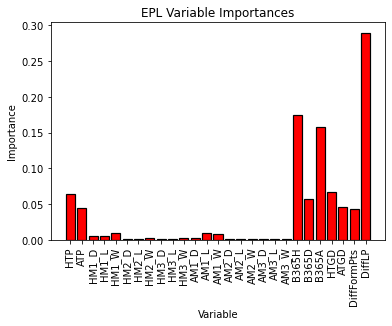

In [39]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, featuresList, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('EPL Variable Importances');